In [50]:
import matplotlib.pyplot as plt


In [60]:
from googleapiclient.discovery import build

yt = build('youtube', 'v3', developerKey= api_key)

playlist_id_bolsonaro = 'UU8hGUtfEgvvnp6IaHSAg1OQ'
playlist_id_lula = 'UUvO2BExvkAbGMsTGnEnI_Ng'




In [22]:
def count_views(playlist_id):
  videos = []
  nextPageToken = None
  while True:
    request = yt.playlistItems().list(
        part='contentDetails', playlistId= playlist_id, maxResults = 50, pageToken = nextPageToken)

    resposta = request.execute()

    video_ids = []
    for item in resposta['items']:
        video_ids.append(item['contentDetails']['videoId'])

    vid_request = yt.videos().list(part = 'statistics', id= ','.join(video_ids))

    vid_response = vid_request.execute()

    for item in vid_response['items']:
        vid_views = item['statistics']['viewCount']
        vid_id = item['id']
        yt_link = f'https://youtu.be/{vid_id}'

        videos.append(
            {
                'views': int(vid_views),
                'url': yt_link
            }
        )
    nextPageToken = resposta.get('nextPageToken')

    if not nextPageToken:
        break
  videos.sort(key=lambda vid:vid['views'], reverse= True)
  
  return videos



In [26]:
bolsonaro = count_views(playlist_id_bolsonaro)


In [63]:
def total_views(lista):
  total_views = 0
  for i in range(len(lista)):
    total_views += lista[i]['views']
  return total_views

In [64]:
total_views(bolsonaro)

183919738

[]

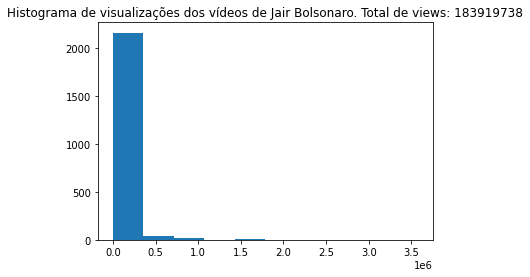

In [78]:
views = []
for i in range(len(bolsonaro)):
  views.append(bolsonaro[i]['views'])

plt.title(f"Histograma de visualizações dos vídeos de Jair Bolsonaro. Total de views: {total_views(bolsonaro)}")
plt.hist(views)
plt.plot()

In [62]:
lula = count_views(playlist_id_lula)

[]

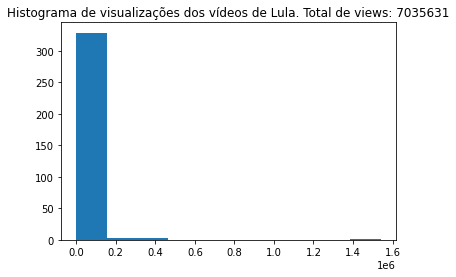

In [79]:
views = []
for i in range(len(lula)):
  views.append(lula[i]['views'])

plt.title(f"Histograma de visualizações dos vídeos de Lula. Total de views: {total_views(lula)}")
plt.hist(views)
plt.plot()